<a href="https://colab.research.google.com/github/SenorFoca/CMF/blob/main/CW1_IndividualAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Python fundamentals

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

#### Download Historical Stock Data with yfinance

In [2]:
# Download stock data
data = yf.download('TSLA', start='2023-01-01', end='2023-10-31')

[*********************100%***********************]  1 of 1 completed


#### Data Manipulation with pandas

In [3]:
# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()   # 'Adj Close' refers to the adjusted closing price of the stock

# Calculate moving averages
data['MA20'] = data['Adj Close'].rolling(window=20).mean()
data['MA50'] = data['Adj Close'].rolling(window=50).mean()

#### Numerical Computations with numpy

In [4]:
# Remove NaN values resulting from pct_change()
daily_returns = data['Daily Return'].dropna()

# Compute mean and standard deviation
mean_return = np.mean(daily_returns)
std_return = np.std(daily_returns)

print(f"Mean Daily Return: {mean_return:.5f}")
print(f"Standard Deviation of Daily Returns: {std_return:.5f}")

Mean Daily Return: 0.00350
Standard Deviation of Daily Returns: 0.03445


In [5]:
# Remove NaN values resulting from pct_change()
daily_returns = data['Daily Return'].dropna()

mean_return = np.mean(daily_returns)* len(daily_returns)
std_return = np.std(daily_returns)* (len(daily_returns) ** 0.5)

print(f"Mean Daily Return: {mean_return:.5f}")
print(f"Standard Deviation of Daily Returns: {std_return:.5f}")

Mean Daily Return: 0.72491
Standard Deviation of Daily Returns: 0.49559


#### Data Visualization with matplotlib

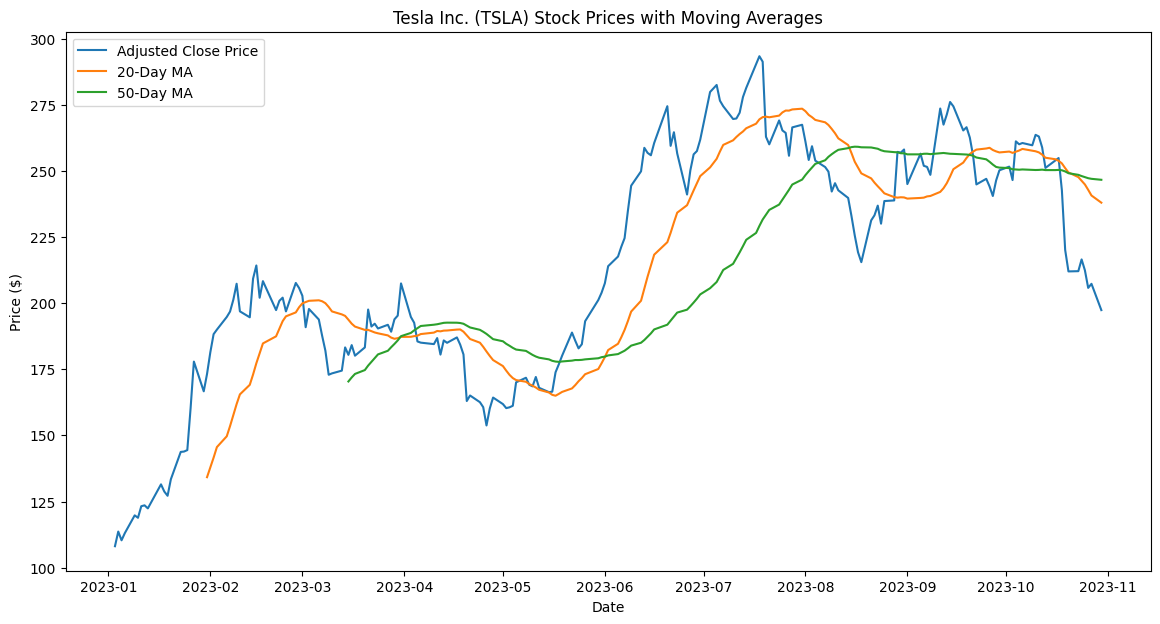

In [6]:
# Plot Adjusted Close Price and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.plot(data['MA20'], label='20-Day MA')
plt.plot(data['MA50'], label='50-Day MA')
plt.title('Tesla Inc. (TSLA) Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

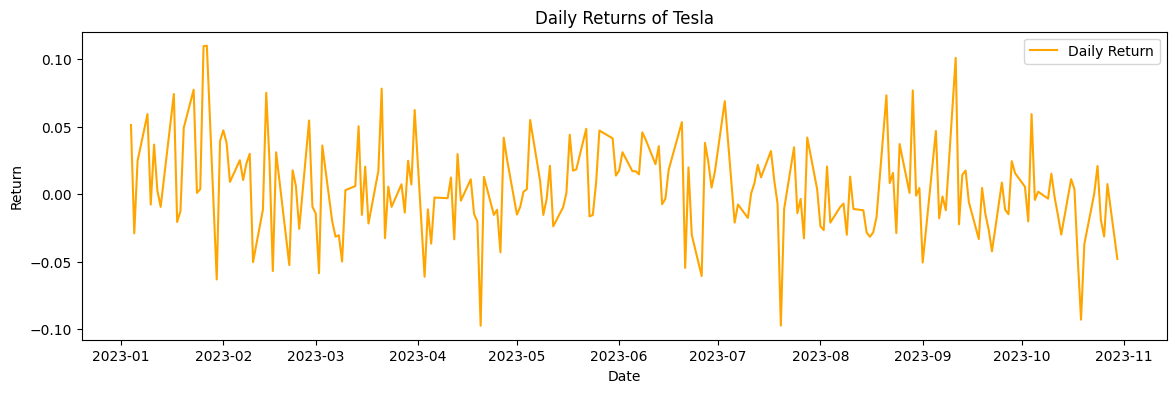

In [7]:
# Plot Daily Returns
plt.figure(figsize=(14, 4))
plt.plot(data['Daily Return'], label='Daily Return', color='orange')
plt.title('Daily Returns of Tesla')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

#Data Handling

In [12]:
# Define tickers (Shell and Easyjet) and time period
tickers = ['SHEL.L', 'EZJ.L']
start_date = '2022-11-08'
end_date = '2024-11-08'

# Download data from Yahoo Finance
data = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

[*********************100%***********************]  2 of 2 completed


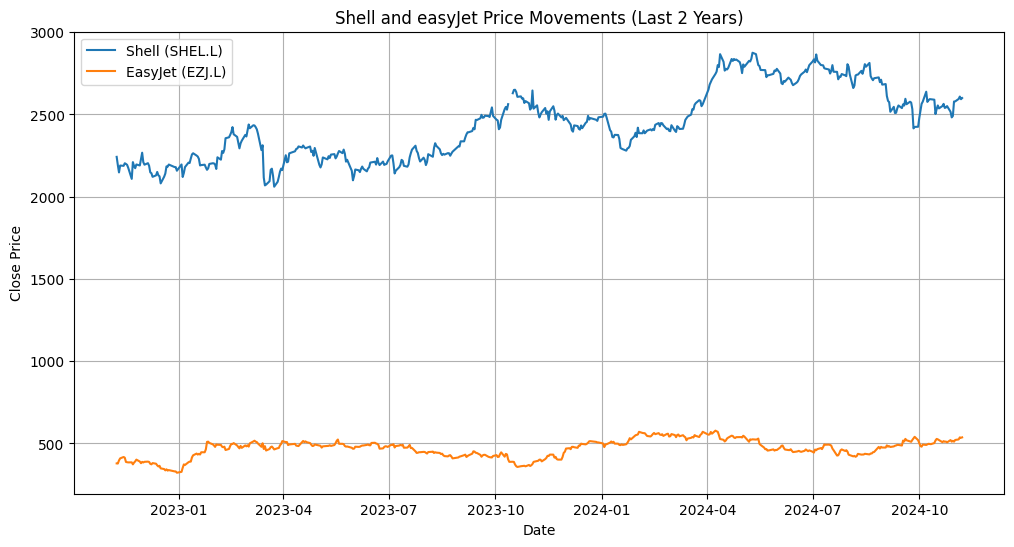

In [13]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SHEL.L'], label='Shell (SHEL.L)')
plt.plot(data.index, data['EZJ.L'], label='EasyJet (EZJ.L)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Shell and easyJet Price Movements (Last 2 Years)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate annualized average returns and standard deviations assuming 252 trading days per year
annualized_returns = daily_returns.mean() * 252
annualized_std_devs = daily_returns.std() * np.sqrt(252)


<ipython-input-14-81d04dadcd04>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


In [15]:
# Display annualized average returns and standard deviations
annualized_results = pd.DataFrame({
    'Annualized Return': annualized_returns,
    'Annualized Std Dev': annualized_std_devs
})
print(annualized_results)


        Annualized Return  Annualized Std Dev
Ticker                                       
EZJ.L            0.234237            0.346760
SHEL.L           0.095683            0.208631
